In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [17]:
df = pd.read_csv("heart.csv")

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
#Handle Missing Values
df.dropna(inplace=True)

In [20]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
#Encode Categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LebalEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [23]:
#Define Features and Target Variables
X = df.drop(columns=['target'])
y = df['target']

In [24]:
#Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [25]:
#Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Train SVM with Linear Model
svm_linear = SVC(kernel = 'linear',C = 1)
svm_linear.fit(X_train,y_train)
y_pred_linear = svm_linear.predict(X_test)

#Train SVM with Polynomial Kernel
svm_poly = SVC(kernel = 'poly',degree = 3, C = 1)
svm_poly.fit(X_train,y_train)
y_pred_poly = svm_poly.predict(X_test)

#Train SVM with RBF Kernel
svm_rbf = SVC(kernel = 'rbf',C = 1, gamma='scale')
svm_rbf.fit(X_train,y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [29]:
#Accuracy Score
acc_linear = accuracy_score(y_test,y_pred_linear)
acc_poly = accuracy_score(y_test,y_pred_poly)
acc_rbf = accuracy_score(y_test,y_pred_rbf)

In [30]:
print(f"The Accuracy Score for SVM Linear Kernel is : {acc_linear:.2f}")
print(f"The Accuracy Score for SVM Polynomial Kernel is : {acc_poly:.2f}")
print(f"The Accuracy Score for SVM RBF Kernel is : {acc_rbf:.2f}")

The Accuracy Score for SVM Linear Kernel is : 0.81
The Accuracy Score for SVM Polynomial Kernel is : 0.91
The Accuracy Score for SVM RBF Kernel is : 0.89


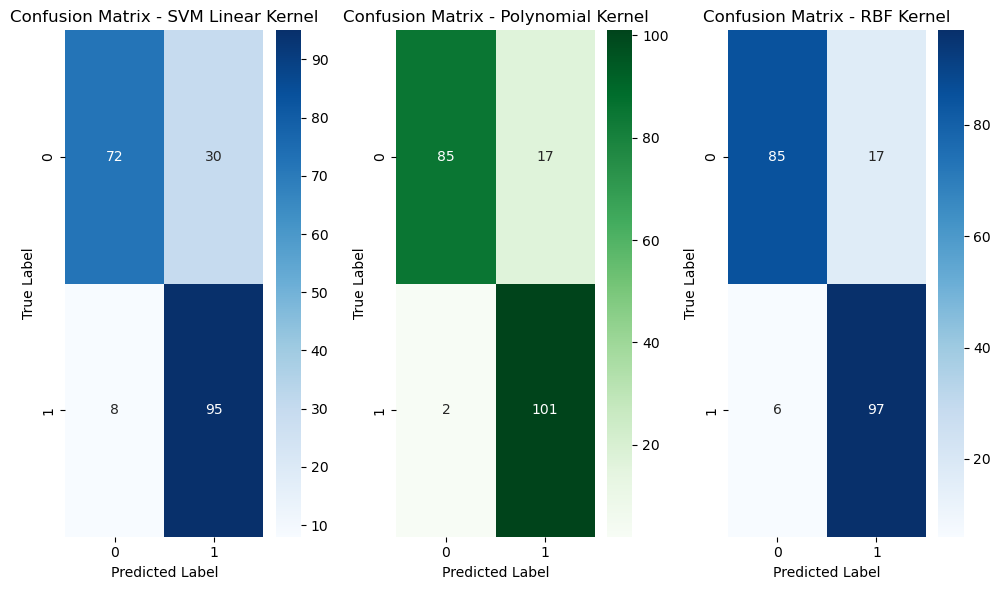

In [35]:
#Visualizaing Confusion Matrix
cm_linear = confusion_matrix(y_test,y_pred_linear)
cm_poly = confusion_matrix(y_test,y_pred_poly)
cm_rbf = confusion_matrix(y_test,y_pred_rbf)

#Creating SubPlots
fig, axes = plt.subplots(1,3,figsize = (10,6))

#Plot Confusion Matrix for Linear Kernel
sns.heatmap(cm_linear,annot=True,fmt="d",cmap="Blues",ax = axes[0])
axes[0].set_title("Confusion Matrix - SVM Linear Kernel")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")


#Plot Confusion Matrix for Poly Kernel
sns.heatmap(cm_poly,annot=True,fmt="d",cmap="Greens",ax = axes[1])
axes[1].set_title("Confusion Matrix - Polynomial Kernel")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

#Plot Confusion Matrix for RBF Kernel
sns.heatmap(cm_rbf,annot=True,fmt="d",cmap="Blues",ax = axes[2])
axes[2].set_title("Confusion Matrix - RBF Kernel")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()